<a href="https://colab.research.google.com/github/lemonbreez/data-preprocessing-for-store-warehouse/blob/main/Assignment_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GROUP MEMBERS:
*   Maysa Saeed Alghamdi
*   Manar Ali Alali
*   Raneem Abdullah Alshehri





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install scikit-learn pandas numpy dtale notebook

In [ ]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataminingAssignment/Dataset1.csv")

This shows us the mean, std, and the quatiles

In [ ]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1936.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515186,51534.769467,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.137055,29362.828420,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.525000,48765.500000,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000


df.info shows each attribute with the number of instances as well as their data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   float64
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   float64
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

## calling a method that shows the missing values in each column

DATA CLEANING


In [ ]:
df.isnull().sum()

Row ID                   1
Order Priority           1
Discount                 1
Unit Price               1
Shipping Cost            1
Customer ID              1
Customer Name            1
Ship Mode                1
Customer Segment         1
Product Category         1
Product Sub-Category     1
Product Container        1
Product Name             1
Product Base Margin     17
Country                  1
Region                   1
State or Province        1
City                     1
Postal Code              1
Order Date               1
Ship Date                1
Profit                   1
Quantity ordered new     1
Sales                    1
Order ID                 1
dtype: int64

In [ ]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847.0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221.0,07/01/2015,08/01/2015,4.5600,4.0,13.01,88522.0
1,20228.0,Not Specified,0.02,500.98,26.00,5.0,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776.0,13/06/2015,15/06/2015,4390.3665,12.0,6362.85,90193.0
2,21776.0,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203.0,15/02/2015,17/02/2015,-53.8096,22.0,211.15,90192.0
3,24844.0,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,14/05/2015,803.4705,16.0,1164.45,86838.0
4,24846.0,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,13/05/2015,-24.0300,7.0,22.23,86838.0


## the size of the dataset before preprocessing

In [ ]:
df.shape

(1953, 25)

In [ ]:
print("Missing values distribution: ")
print(df.isnull().mean())

Missing values distribution: 
Row ID                  0.000512
Order Priority          0.000512
Discount                0.000512
Unit Price              0.000512
Shipping Cost           0.000512
Customer ID             0.000512
Customer Name           0.000512
Ship Mode               0.000512
Customer Segment        0.000512
Product Category        0.000512
Product Sub-Category    0.000512
Product Container       0.000512
Product Name            0.000512
Product Base Margin     0.008705
Country                 0.000512
Region                  0.000512
State or Province       0.000512
City                    0.000512
Postal Code             0.000512
Order Date              0.000512
Ship Date               0.000512
Profit                  0.000512
Quantity ordered new    0.000512
Sales                   0.000512
Order ID                0.000512
dtype: float64


In [ ]:
df['Country'].value_counts()

United States    1952
Name: Country, dtype: int64

Remove rows containing integers in 'Product Name', as the attribute had some int mixed in. For eg: 6160, 5155 and more


In [ ]:
print(df['Product Name'][26:37])

26                                                 6160
27    Okidata Pacemark 4410N Wide Format Dot Matrix ...
28                                           Xerox 1903
29                           Durable Pressboard Binders
30                                           Newell 310
31                                            Xerox 193
32    Snap-A-Way® Black Print Carbonless Speed Messa...
33                                            Avery 501
34                                                 5165
35                Dual Level, Single-Width Filing Carts
36    Hon 4070 Series Pagoda™ Armless Upholstered St...
Name: Product Name, dtype: object


In [ ]:

# df = df[~df['Product Name'].str.contains(r'\d', na=False)]
df['Product Name'] = df['Product Name'].astype(str)

# Use a regular expression to identify rows containing only integers
integer_rows = df['Product Name'].str.match(r'^\d+$')

# Remove rows containing only integers
df = df[~integer_rows]
# Now, 'df' only contains rows without integer values in 'Product Name'


In [ ]:
print(df['Product Name'][26:37]) #successfully removes the int values

27    Okidata Pacemark 4410N Wide Format Dot Matrix ...
28                                           Xerox 1903
29                           Durable Pressboard Binders
30                                           Newell 310
31                                            Xerox 193
32    Snap-A-Way® Black Print Carbonless Speed Messa...
33                                            Avery 501
35                Dual Level, Single-Width Filing Carts
36    Hon 4070 Series Pagoda™ Armless Upholstered St...
37                          Hon Valutask™ Swivel Chairs
38                Dual Level, Single-Width Filing Carts
Name: Product Name, dtype: object


In [ ]:
df['Product Container'].value_counts()

Small Box     952
Wrap Bag      279
Small Pack    219
Jumbo Drum    152
Jumbo Box     124
Large Box     100
Medium Box     87
Name: Product Container, dtype: int64

Above, only the Jumbo Drum stands out so we will assume its with Jumbo Box and replace it with Box instead of Drum

In [ ]:
df['Product Container'] = df['Product Container'].replace('Jumbo Drum', 'Jumbo Box')

In [ ]:
df['Product Container'].value_counts()

Small Box     952
Wrap Bag      279
Jumbo Box     276
Small Pack    219
Large Box     100
Medium Box     87
Name: Product Container, dtype: int64

##Data Selection: Redundancy was found, in columns Country and Row id. So we will delete them

In [ ]:
df = df.drop(columns=['Country'])
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847.0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221.0,07/01/2015,08/01/2015,4.5600,4.0,13.01,88522.0
1,20228.0,Not Specified,0.02,500.98,26.00,5.0,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776.0,13/06/2015,15/06/2015,4390.3665,12.0,6362.85,90193.0
2,21776.0,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203.0,15/02/2015,17/02/2015,-53.8096,22.0,211.15,90192.0
3,24844.0,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,14/05/2015,803.4705,16.0,1164.45,86838.0
4,24846.0,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,13/05/2015,-24.0300,7.0,22.23,86838.0


In [ ]:
df = df.drop(columns=['Row ID'])
df.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221.0,07/01/2015,08/01/2015,4.5600,4.0,13.01,88522.0
1,Not Specified,0.02,500.98,26.00,5.0,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776.0,13/06/2015,15/06/2015,4390.3665,12.0,6362.85,90193.0
2,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203.0,15/02/2015,17/02/2015,-53.8096,22.0,211.15,90192.0
3,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,14/05/2015,803.4705,16.0,1164.45,86838.0
4,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,13/05/2015,-24.0300,7.0,22.23,86838.0


This is a heatmap that underlines the instances of missing values in the dataset

<Axes: >

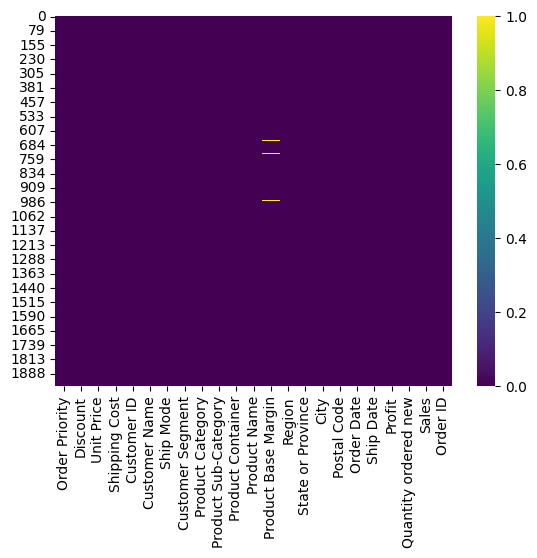

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')

In [ ]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')# mean , median , most_frequent , (constant ==fill_value)
df['Order Priority'] = imr.fit_transform(df[['Order Priority']])

# After impute
df['Order Priority'].isnull().sum()

0

## filling the missing values with the most frequent

In [ ]:
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # mean , median , most_frequent , (constant ==fill_value)

# Loop through attributes with missing values and impute them
attributes_with_missing = df.columns[df.isnull().any()]
for attribute in attributes_with_missing:
    df[attribute] = imr.fit_transform(df[[attribute]])

# After impute
print(df.isnull().sum())

Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64


**Data Integration is NOT needed as we only have one source of data**


## Data Transfomation

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Order Date'].describe()

count           1914
unique           179
top       09/04/2015
freq              28
Name: Order Date, dtype: object

In [ ]:
df['Ship Date'].describe()

count           1914
unique           187
top       08/01/2015
freq              23
Name: Ship Date, dtype: object

This will transform the Order & Ship Date to datetime type

In [ ]:
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
except pd.errors.OutOfBoundsDatetime as e:
    print(f"Error: {e}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 1952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1914 non-null   object        
 1   Discount              1914 non-null   float64       
 2   Unit Price            1914 non-null   float64       
 3   Shipping Cost         1914 non-null   float64       
 4   Customer ID           1914 non-null   float64       
 5   Customer Name         1914 non-null   object        
 6   Ship Mode             1914 non-null   object        
 7   Customer Segment      1914 non-null   object        
 8   Product Category      1914 non-null   object        
 9   Product Sub-Category  1914 non-null   object        
 10  Product Container     1914 non-null   object        
 11  Product Name          1914 non-null   object        
 12  Product Base Margin   1914 non-null   float64       
 13  Region            

In [ ]:
from datetime import datetime
min_date = df['Order Date'].min()
max_date = df['Order Date'].max()

print(f"Start date of transactions is {datetime.strftime(min_date, '%d %B %Y')} and the latest transaction is {datetime.strftime(max_date, '%d %B %Y')}")


Start date of transactions is 01 January 2015 and the latest transaction is 30 June 2015


We transformed the Order & Ship Date to the Elapsed Time attribute, so it shows how much time passed after the Order was placed

In [ ]:
df['Elapsed Time'] = df[['Order Date','Ship Date']].apply(lambda x: (x['Ship Date'] - x['Order Date']).days, axis = 1)


We will drop the Ship Date attribute as it is reduntant when Elapsed Time exists now

In [ ]:
df.drop('Ship Date', axis = 1, inplace = True)


This is the transformation of the Order ID attribute, as there are repeated Order ID for several rows

In [ ]:
order_multi_date = df.groupby('Order ID')['Order Date'].nunique() > 1

dict_order = dict()

for od in order_multi_date[order_multi_date].index.to_list():
    dict_order[od] = dict()
    add = 1
    for od_date in df[df['Order ID'] == od].groupby('Order Date').count().index:
        dict_order[od][od_date] = "{:.2f}".format(od) + str(add)
        add += 1

In [ ]:
# Reassigning new 'Order ID'
def clean_id(col):
    if col['Order ID'] in dict_order.keys():
        return dict_order[col['Order ID']][col['Order Date']]
    else:
        return col['Order ID']

df['Order ID'] = df[['Order ID','Order Date']].apply(clean_id, axis = 1)

We chose Order ID with Order Date as only one Order ID has only unique Order Date

In [ ]:
# Rechecking if there were still transaction with more than one 'Order Date'
amount_order = len(df.groupby('Order ID'))
order_multi_date = df.groupby('Order ID')['Order Date'].nunique() > 1

print(f"Amount of orders based on Order ID is {amount_order}")
print(f"Amount of transactions which has one Order ID with more than one Order Date is {order_multi_date.sum()}")

Amount of orders based on Order ID is 1352
Amount of transactions which has one Order ID with more than one Order Date is 0


In [ ]:
# Looking for 'Order ID' which has several shipping mode
order_multi_ship = df.groupby('Order ID')['Ship Mode'].nunique() > 1
print(f"Amount of transactions with different shipping mode is {order_multi_ship.sum()}")

Amount of transactions with different shipping mode is 194


In [ ]:
# Looking for 'Order ID' which has several priorities
order_multi_prio = df.groupby('Order ID')['Order Priority'].nunique() > 1
print(f"Amount of transactions with different priorities is {order_multi_prio.sum()}")

Amount of transactions with different priorities is 3


In [ ]:
# Looking for 'Order ID' which has several elapsed time
order_multi_time = df.groupby('Order ID')['Elapsed Time'].nunique() > 1
print(f"Amount of transactions with different elapsed time is {order_multi_time.sum()}")

Amount of transactions with different elapsed time is 316


In [ ]:
# Checking index of the 2 transactions
print(f"Indexes of transactions with different shipping mode are {' & '.join(str(index) for index in order_multi_ship[order_multi_ship].index)}")
print(f"Indexes of transactions with different priorities are {' & '.join(str(index) for index in order_multi_prio[order_multi_prio].index)}")
print(f"Indexes of transactions with different elapsed time are {' & '.join(str(index) for index in order_multi_time[order_multi_time].index)}")


Indexes of transactions with different shipping mode are 962.0 & 9606.0 & 12224.0 & 13959.0 & 21636.0 & 24193.0 & 29319.0 & 29350.0 & 32420.0 & 33635.0 & 34017.0 & 37537.0 & 39015.0 & 40997.0 & 44231.0 & 47108.0 & 50656.0 & 53476.0 & 54949.0 & 55874.0 & 85850.0 & 85866.0 & 85880.0 & 85914.0 & 85966.0 & 85991.0 & 86050.0 & 86075.0 & 86077.0 & 86085.0 & 86221.0 & 86227.0 & 86263.0 & 86264.0 & 86308.0 & 86369.0 & 86409.0 & 86491.0 & 86507.0 & 86600.0 & 86633.0 & 86655.0 & 86668.0 & 86688.0 & 86723.0 & 86792.0 & 86813.0 & 86826.0 & 86847.0 & 86860.0 & 86899.0 & 86926.0 & 86958.0 & 87033.0 & 87134.0 & 87146.0 & 87160.0 & 87162.0 & 87214.0 & 87234.0 & 87259.0 & 87272.0 & 87357.0 & 87378.0 & 87383.0 & 87396.0 & 87570.0 & 87585.0 & 87678.0 & 87696.0 & 87726.0 & 87812.0 & 87831.0 & 87877.0 & 87962.0 & 87993.0 & 88060.0 & 88084.0 & 88136.0 & 88157.0 & 88191.0 & 88198.0 & 88219.0 & 88282.0 & 88298.0 & 88348.0 & 88387.0 & 88443.0 & 88544.0 & 88556.0 & 88558.0 & 88571.0 & 88587.0 & 88588.0 & 88599.

In [ ]:
# Making dictionary for replacing new 'Order ID'
dict_ship = dict()

for od in order_multi_ship[order_multi_ship].index.to_list():
    dict_ship[od] = dict()
    add = 1
    for od_ship in df[df['Order ID'] == od]['Ship Mode'].unique():
        dict_ship[od][od_ship] = "{:.2f}".format(od) + str(add)
        add += 1

In [ ]:
# Reassigning new 'Order ID'
def clean_id(col):
    if col['Order ID'] in dict_ship.keys():
        return dict_ship[col['Order ID']][col['Ship Mode']]
    else:
        return col['Order ID']

df['Order ID'] = df[['Order ID','Ship Mode']].apply(clean_id, axis = 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 1952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        1914 non-null   object        
 1   Discount              1914 non-null   float64       
 2   Unit Price            1914 non-null   float64       
 3   Shipping Cost         1914 non-null   float64       
 4   Customer ID           1914 non-null   float64       
 5   Customer Name         1914 non-null   object        
 6   Ship Mode             1914 non-null   object        
 7   Customer Segment      1914 non-null   object        
 8   Product Category      1914 non-null   object        
 9   Product Sub-Category  1914 non-null   object        
 10  Product Container     1914 non-null   object        
 11  Product Name          1914 non-null   object        
 12  Product Base Margin   1914 non-null   float64       
 13  Region            

In [ ]:
df.head()

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Profit,Quantity ordered new,Sales,Order ID,Elapsed Time
0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221.0,2015-01-07,4.5600,4.0,13.01,88522.0,1
1,Not Specified,0.02,500.98,26.00,5.0,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,...,West,California,San Gabriel,91776.0,2015-06-13,4390.3665,12.0,6362.85,90193.0,2
2,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203.0,2015-02-15,-53.8096,22.0,211.15,90192.0,2
3,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372.0,2015-05-12,803.4705,16.0,1164.45,86838.0,2
4,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372.0,2015-05-12,-24.0300,7.0,22.23,86838.0,1


### Detecting outliers in 'Unit Price'

<Axes: >

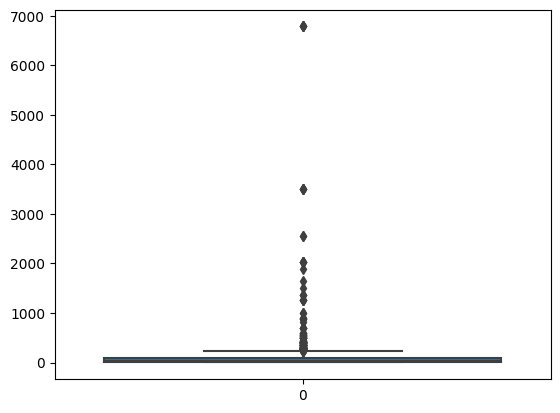

In [ ]:
sns.boxplot(df['Unit Price'])

### removing outliers using IQR for Unit Price

In [ ]:
from scipy import stats
import numpy as np
sorts=df['Unit Price'].sort_values()
sorts

496        1.14
1691       1.14
473        1.26
1155       1.48
1203       1.48
         ...   
27      3502.14
663     6783.02
1605    6783.02
1111    6783.02
888     6783.02
Name: Unit Price, Length: 1914, dtype: float64

Sorting the data

In [ ]:
sorts=df['Unit Price'].sort_values()
sorts

496        1.14
1691       1.14
473        1.26
1155       1.48
1203       1.48
         ...   
27      3502.14
663     6783.02
1605    6783.02
1111    6783.02
888     6783.02
Name: Unit Price, Length: 1914, dtype: float64

calculating Q1, Q2 and IQR

In [ ]:
q1=sorts.quantile(0.25)
q3=sorts.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: 6.48
The value of q3 is: 95.99


In [ ]:
iqr = q3 - q1
print("The value of iqr is:",iqr)

The value of iqr is: 89.50999999999999


In [ ]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

print("The value of lower bound is:",round(lower))
print("The value of upper bound is:",round(upper))

The value of lower bound is: -128
The value of upper bound is: 230


Trim based on the giving values , and the fact that a price can not be less than 0

In [ ]:
index = df[(df['Unit Price'] >= 243)|(df['Unit Price'] <= 0)].index
df.drop(index, inplace=True)
df['Unit Price'].describe()

count    1738.000000
mean       44.132071
std        56.988707
min         1.140000
25%         6.280000
50%        15.960000
75%        55.990000
max       240.980000
Name: Unit Price, dtype: float64

number of rows after removal

In [ ]:
df.shape

(1738, 23)

<Axes: >

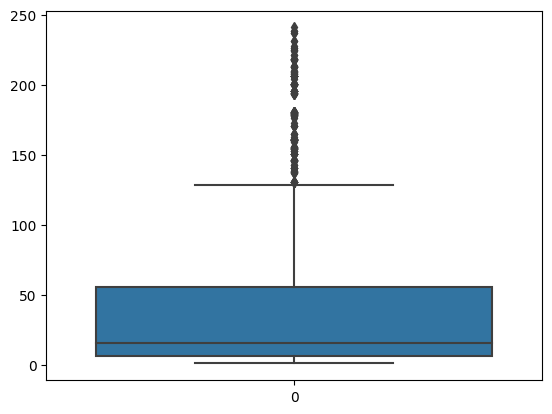

In [ ]:
sns.boxplot(df['Unit Price'])

### Detecting outliers in 'Shipping Cost' + Removing using IQR

In [ ]:
sortU=df['Shipping Cost'].sort_values()
sortU

558       0.49
1836      0.49
1167      0.49
1497      0.49
1245      0.49
         ...  
137      80.20
1649     89.30
717     110.20
1440    110.20
1444    110.20
Name: Shipping Cost, Length: 1738, dtype: float64

In [ ]:
q1=sortU.quantile(0.25)
q3=sortU.quantile(0.75)

print("The value of q1 is:",q1)
print("The value of q3 is:",q3)

The value of q1 is: 2.64
The value of q3 is: 9.86


In [ ]:
iqr = q3 - q1
print("The value of iqr is:",iqr)

The value of iqr is: 7.219999999999999


In [ ]:
lower=q1-1.5*iqr
upper=q3+1.5*iqr

print("The value of lower bound is:",round(lower))
print("The value of upper bound is:",round(upper))

The value of lower bound is: -8
The value of upper bound is: 21


Here we defined the bounds of Shiping Cost i.e it shouldn't be more than 80 or less that -7

In [ ]:
index = df[(df['Shipping Cost'] >= 80)|(df['Shipping Cost'] <= -7)].index
df.drop(index, inplace=True)
df['Shipping Cost'].describe()

count    1732.000000
mean       10.409838
std        13.625655
min         0.490000
25%         2.640000
50%         5.670000
75%         9.710000
max        74.350000
Name: Shipping Cost, dtype: float64

# number of rows after removal

After preprocessing and removing the outliers the number of rows and col have decreased from (1953, 25) to (1771, 23)


In [ ]:
df.shape

(1732, 23)

In [ ]:
#importing all libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import sklearn.linear_model as sk
import matplotlib.pyplot as plt


#importing the dataset
dataset=pd.read_csv("/content/drive/MyDrive/DataminingAssignment/Dataset1.csv")

In [ ]:
dataset

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847.0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221.0,07/01/2015,08/01/2015,4.5600,4.0,13.01,88522.0
1,20228.0,Not Specified,0.02,500.98,26.00,5.0,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776.0,13/06/2015,15/06/2015,4390.3665,12.0,6362.85,90193.0
2,21776.0,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203.0,15/02/2015,17/02/2015,-53.8096,22.0,211.15,90192.0
3,24844.0,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,14/05/2015,803.4705,16.0,1164.45,86838.0
4,24846.0,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372.0,12/05/2015,13/05/2015,-24.0300,7.0,22.23,86838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,19843.0,High,0.10,7.99,5.03,3397.0,Andrea Shaw,Regular Air,Small Business,Technology,...,Central,Illinois,Danville,61832.0,11/03/2015,12/03/2015,-160.9520,22.0,143.12,87536.0
1949,26208.0,Not Specified,0.08,11.97,5.81,3399.0,Marvin Reid,Regular Air,Small Business,Office Supplies,...,Central,Illinois,Des Plaines,60016.0,29/03/2015,31/03/2015,-41.8700,5.0,59.98,87534.0
1950,24911.0,Medium,0.10,9.38,4.93,3400.0,Florence Gold,Express Air,Small Business,Furniture,...,East,West Virginia,Fairmont,26554.0,04/04/2015,04/04/2015,-24.7104,15.0,135.78,87537.0
1951,25914.0,High,0.10,105.98,13.99,3403.0,Tammy Buckley,Express Air,Consumer,Furniture,...,West,Wyoming,Cheyenne,82001.0,08/02/2015,11/02/2015,349.4850,5.0,506.50,87530.0


In [ ]:
df.head(2)

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Profit,Quantity ordered new,Sales,Order ID,Elapsed Time
0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221.0,2015-01-07,4.5600,4.0,13.01,88522.0,1
2,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203.0,2015-02-15,-53.8096,22.0,211.15,90192.0,2


**LINEAR REGRESSION**

Checking the type

In [ ]:
df["Shipping Cost"].dtype
df["Sales"].dtype

dtype('float64')

checking if i have null values

In [ ]:
# Check for missing values in the "Sales" and "Price" columns
missing_sales = df[['Shipping Cost', 'Sales']].isnull().values.any()

# Print the result
if missing_sales:
    print("Missing values found in either the 'Sales' or 'Shipping Cost' column.")
else:
    print("No missing values in either the 'Sales' or 'Shipping Cost' column.")

No missing values in either the 'Sales' or 'Shipping Cost' column.


Since there’s no missing values and the data is clean we start drawing

<function matplotlib.pyplot.show(close=None, block=None)>

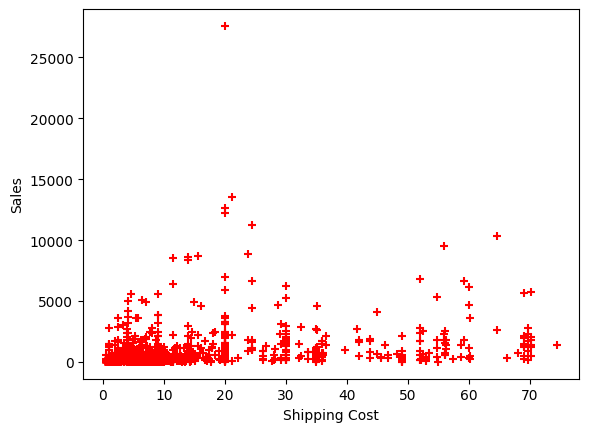

In [ ]:
plt.scatter(df["Shipping Cost"],df["Sales"],marker="+",color="red")
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.show

regression algorithm to predict Sales against their Shipping Cost

In [ ]:
reg = sk.LinearRegression()

In [ ]:
reg.fit (df [["Shipping Cost"]],df[ "Sales"])

LinearRegression()

coefficient and intercept italicized text

In [ ]:
reg.coef_

array([32.18026245])

In [ ]:
reg.intercept_

220.00358365959073

draw the regression line

<function matplotlib.pyplot.show(close=None, block=None)>

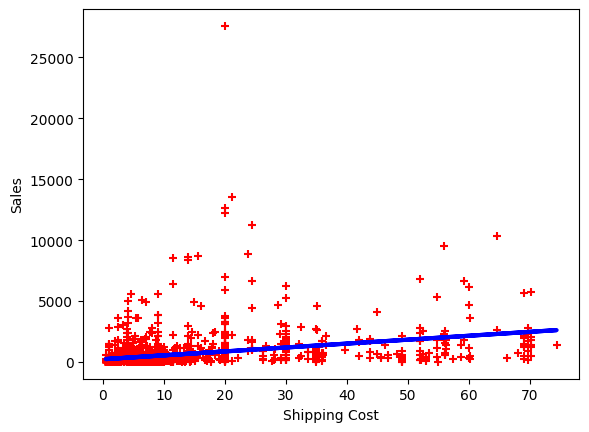

In [ ]:
plt.scatter(df["Shipping Cost"],df["Sales"],marker="+",color="red")
plt.plot (df[["Shipping Cost"]], reg.predict(df[["Shipping Cost"]]) , color= "blue", linewidth=3)
plt.xlabel("Shipping Cost")
plt.ylabel("Sales")
plt.show

Predict for some value

In [ ]:
reg.predict([[500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16310.13480783])

In [ ]:
reg.score(df [["Shipping Cost"]],df[ "Sales"])

0.10740896894424601

**NAIVE BAYES CLASSIFICATION**

In [ ]:
import pandas as pd
from sklearn .naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X= df[['Unit Price','Shipping Cost','Discount',]]
y=df['Ship Mode']
df

,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,...,Region,State or Province,City,Postal Code,Order Date,Profit,Quantity ordered new,Sales,Order ID,Elapsed Time
0,High,0.01,2.84,0.93,3.0,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,...,West,Washington,Anacortes,98221.0,2015-01-07,4.5600,4.0,13.01,88522.0,1
2,Critical,0.06,9.48,7.29,11.0,Marcus Dunlap,Regular Air,Home Office,Furniture,Office Furnishings,...,East,New Jersey,Roselle,7203.0,2015-02-15,-53.8096,22.0,211.15,90192.0,2
3,Medium,0.09,78.69,19.99,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,Office Furnishings,...,Central,Minnesota,Prior Lake,55372.0,2015-05-12,803.4705,16.0,1164.45,86838.0,2
4,Medium,0.08,3.28,2.31,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372.0,2015-05-12,-24.0300,7.0,22.23,86838.0,1
5,Medium,0.05,3.28,4.20,14.0,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Minnesota,Prior Lake,55372.0,2015-05-12,-37.0300,4.0,13.99,86838.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,High,0.10,7.99,5.03,3397.0,Andrea Shaw,Regular Air,Small Business,Technology,Telephones and Communication,...,Central,Illinois,Danville,61832.0,2015-03-11,-160.9520,22.0,143.12,87536.0,1
1949,Not Specified,0.08,11.97,5.81,3399.0,Marvin Reid,Regular Air,Small Business,Office Supplies,Pens & Art Supplies,...,Central,Illinois,Des Plaines,60016.0,2015-03-29,-41.8700,5.0,59.98,87534.0,2
1950,Medium,0.10,9.38,4.93,3400.0,Florence Gold,Express Air,Small Business,Furniture,Office Furnishings,...,East,West Virginia,Fairmont,26554.0,2015-04-04,-24.7104,15.0,135.78,87537.0,0
1951,High,0.10,105.98,13.99,3403.0,Tammy Buckley,Express Air,Consumer,Furniture,Office Furnishings,...,West,Wyoming,Cheyenne,82001.0,2015-02-08,349.4850,5.0,506.50,87530.0,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

Delivery Truck       0.48      0.91      0.62        33
   Express Air       0.00      0.00      0.00        45
   Regular Air       0.85      0.90      0.88       269

      accuracy                           0.78       347
     macro avg       0.44      0.60      0.50       347
  weighted avg       0.71      0.78      0.74       347



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Save the dataset to Google Drive
df.to_csv('/content/drive/MyDrive/my_dataset.csv', index=False)
